In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Input

In [2]:
OS1 = '../experiments/exp13/run1/cat/tables/tcr_barcode.csv'
OS2 = '../experiments/exp13/run2/cat/tables/tcr_barcode.csv'

# Load

In [3]:
os1 = pd.read_csv(OS1)

/home/people/herpov/.conda/envs/snakemake/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (1,4,5,6,7,9,10,11,13,15,17,19,20,21,23,25,27,28,30,31,32,33,34,35,36,37,38,39,42,44,45,49,50,58,59,60,61,62,63,64,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
os2 = pd.read_csv(OS2)

In [ ]:
os1.shape

In [ ]:
os1.cdr3_comb.dropna().isin(os2.cdr3_comb.dropna()).sum()

In [10]:
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2

d1 = os1[(os1.umi_count_mhc >= 2) & (os1.delta_umi_mhc >= 1)]
d2 = os2[(os2.umi_count_mhc >= 2) & (os2.delta_umi_mhc >= 1)]

for pep in os1.peptide_HLA.dropna().unique():
    ds1 = d1[(d1.peptide_HLA == pep)]
    ds2 = d2[(d2.peptide_HLA == pep)]
    
    cdr3_comb1 = set(ds1.cdr3_comb.dropna())
    cdr3_comb2 = set(ds2.cdr3_comb.dropna())
    
    cdr3_tra1 = set(ds1.cdr3_TRA.dropna())
    cdr3_tra2 = set(ds2.cdr3_TRA.dropna())
    
    cdr3_trb1 = set(ds1.cdr3_TRB.dropna())
    cdr3_trb2 = set(ds2.cdr3_TRB.dropna())
    
    print(pep)
    print('1OS') #, len(ds1.ct.unique())
    print('CDR3 comb.', len(cdr3_comb1), len(cdr3_comb1.intersection(cdr3_comb2)), len(cdr3_comb1 - cdr3_comb2))
    print('CDR3 TRA', len(cdr3_tra1), len(cdr3_tra1.intersection(cdr3_tra2)), len(cdr3_tra1 - cdr3_tra2))
    print('CDR3 TRB', len(cdr3_trb1), len(cdr3_trb1.intersection(cdr3_trb2)), len(cdr3_trb1 - cdr3_trb2))
    
    print('2OS') #, len(ds2.ct.unique())
    print('CDR3 comb.', len(cdr3_comb2), len(cdr3_comb1.intersection(cdr3_comb2)), len(cdr3_comb2 - cdr3_comb1))
    print('CDR3 TRA', len(cdr3_tra2), len(cdr3_tra1.intersection(cdr3_tra2)), len(cdr3_tra2 - cdr3_tra1))
    print('CDR3 TRB', len(cdr3_trb2), len(cdr3_trb1.intersection(cdr3_trb2)), len(cdr3_trb2 - cdr3_trb1))
    print('---------------------------------------------------------------------------------------')
    print('')
    

RPHERNGFTVL B0702
1OS
CDR3 comb. 62 27 35
CDR3 TRA 34 13 21
CDR3 TRB 38 17 21
2OS
CDR3 comb. 111 27 84
CDR3 TRA 74 13 61
CDR3 TRB 89 17 72
---------------------------------------------------------------------------------------

RVRAYTYSK A0301
1OS
CDR3 comb. 1740 112 1628
CDR3 TRA 1142 93 1049
CDR3 TRB 1471 122 1349
2OS
CDR3 comb. 396 112 284
CDR3 TRA 275 93 182
CDR3 TRB 355 122 233
---------------------------------------------------------------------------------------

CLGGLLTMV A0201
1OS
CDR3 comb. 48 9 39
CDR3 TRA 29 4 25
CDR3 TRB 32 5 27
2OS
CDR3 comb. 38 9 29
CDR3 TRA 26 4 22
CDR3 TRB 29 5 24
---------------------------------------------------------------------------------------

TPRVTGGGAM B0702
1OS
CDR3 comb. 252 64 188
CDR3 TRA 162 41 121
CDR3 TRB 187 44 143
2OS
CDR3 comb. 195 64 131
CDR3 TRA 126 41 85
CDR3 TRB 144 44 100
---------------------------------------------------------------------------------------

VLEETSVML A0201
1OS
CDR3 comb. 47 9 38
CDR3 TRA 27 6 21
CDR3 TRB 30 7

In [7]:
os2.umi_count_cd8.isna().any()

True

In [8]:
os2.loc[os2.umi_count_cd8.isna(), ['peptide_HLA','umi_count_mhc','umi_count_cd8','sample_id']]

,peptide_HLA,umi_count_mhc,umi_count_cd8,sample_id
1856,TPRVTGGGAM B0702,1.0,NaN,NaN
9969,RVRAYTYSK A0301,1.0,NaN,NaN
11110,CLGGLLTMV A0201,1.0,NaN,NaN
13342,RVRAYTYSK A0301,1.0,NaN,NaN
13345,YVLDHLIVV A0201,1.0,NaN,NaN
...,...,...,...,...
16164,RPHERNGFTVL B0702,1.0,NaN,NaN
16174,RPHERNGFTVL B0702,1.0,NaN,NaN
16203,YVLDHLIVV A0201,1.0,NaN,NaN
16204,TPRVTGGGAM B0702,1.0,NaN,NaN


In [5]:
os1['umi_count_mhc'] = np.where(os1.peptide_HLA.isna(), np.nan, os1.umi_count_mhc)
os2['umi_count_mhc'] = np.where(os2.peptide_HLA.isna(), np.nan, os2.umi_count_mhc)

os1['umi_count_TRA'] = np.where(os1.ct.isna(), np.nan, os1.umi_count_TRA)
os2['umi_count_TRA'] = np.where(os2.ct.isna(), np.nan, os2.umi_count_TRA)

os1['umi_count_TRB'] = np.where(os1.ct.isna(), np.nan, os1.umi_count_TRB)
os2['umi_count_TRB'] = np.where(os2.ct.isna(), np.nan, os2.umi_count_TRB)

In [6]:
os1['UMIs'] = np.where(os1.ct.isna(), 'background', 'true counts')
os2['UMIs'] = np.where(os2.ct.isna(), 'background', 'true counts')

In [ ]:
os1.loc[os1.HLA_match.isna() & ~os1.peptide_HLA.isna() & os1.ct.isna(), ['ct','peptide_HLA','HLA_cd8']]

In [ ]:
os1.loc[(os1.HLA_match.isna() | os1.peptide_HLA.isna()) & ~os1.ct.isna(), ['ct','peptide_HLA','HLA_cd8','UMIs']]

In [ ]:
os1.loc[os1.sample_id.isna() & ~os1.ct.isna(), ['ct','peptide_HLA','HLA_cd8','UMIs','umi_count_TRA','umi_count_TRB']]

In [7]:
os1['HLA match'] = os1.HLA_match.fillna('NA')
os2['HLA match'] = os2.HLA_match.fillna('NA')

In [11]:
dfs = list()
df = os2.copy()
for var, row in [('umi_count_mhc','UMI'),('delta_umi_mhc','ratio'),
                 ('umi_count_cd8','UMI'),('delta_umi_cd8','ratio'),
                 ('umi_count_TRA','UMI'),('delta_umi_TRA','ratio'),
                 ('umi_count_TRB','UMI'),('delta_umi_TRB','ratio')]:
    tmp = df[var].to_frame().rename(columns={var:'value'})
    tmp['row'] = row
    tmp['col'] = var[-3:]
    tmp['HLA match'] = df['HLA match']
    
    if 'TR' in var:
        tmp['UMIs'] = np.where(df.peptide_HLA.isna(), 'background', 'true counts')
    else:
        tmp['UMIs'] = np.where(df.ct.isna(), 'background', 'true counts')
    
    
    dfs.append(tmp)

In [12]:
plt_df = pd.concat(dfs)

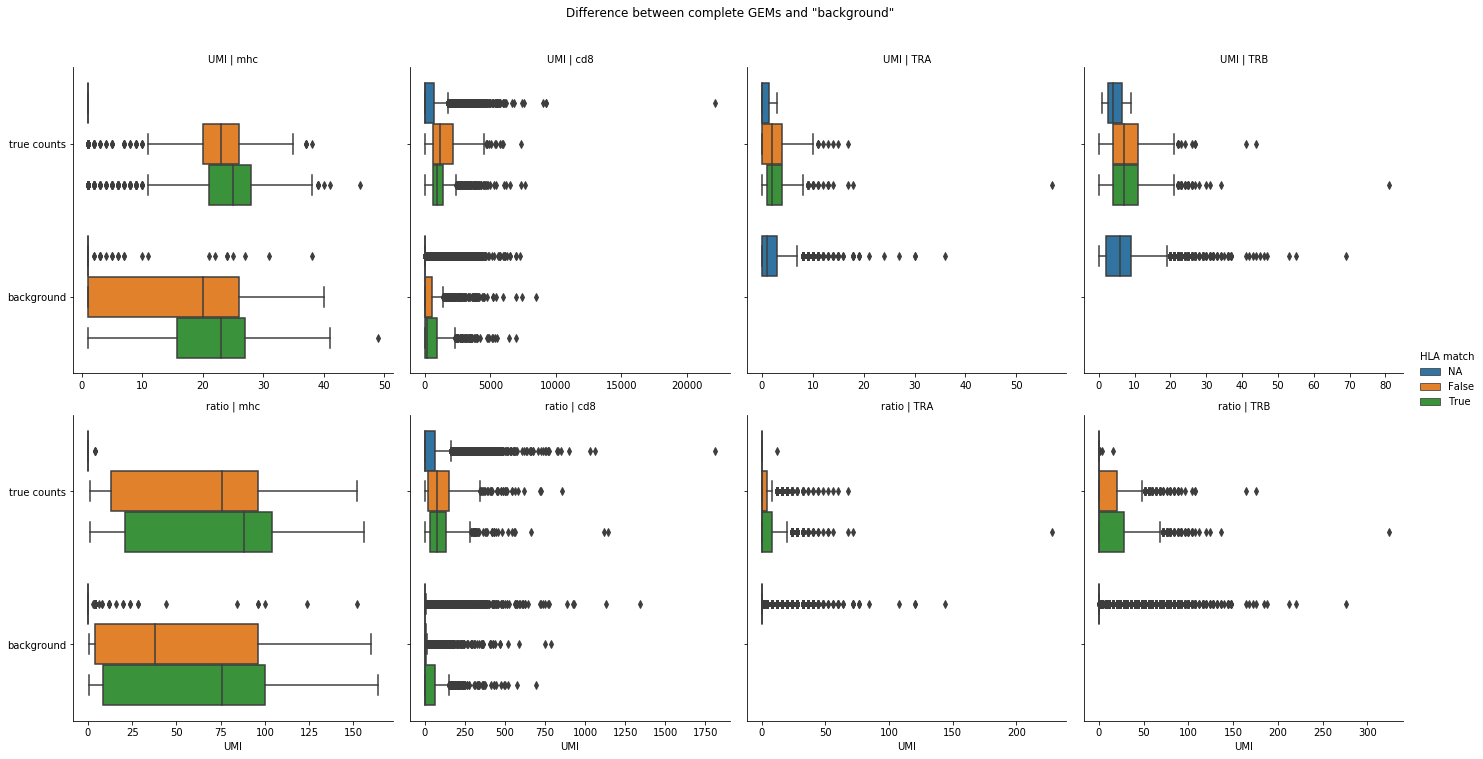

In [13]:
g = sns.catplot(data=plt_df, x='value', y='UMIs', hue='HLA match', kind='box', col='col',row='row', sharex=False)#, margin_titles=True
g.set_titles(col_template="{col_name}", row_template="{row_name}")#, row_template="{row_name}"
g.set_ylabels('')
g.set_xlabels('UMI')
plt.suptitle('Difference between complete GEMs and "background"', y=1.05)
plt.show()

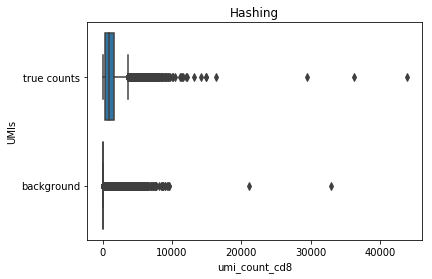

In [13]:
sns.boxplot(data=os1, x='umi_count_cd8', y='UMIs')
plt.title('Hashing')
#plt.xlim(-1,2000)
plt.show()

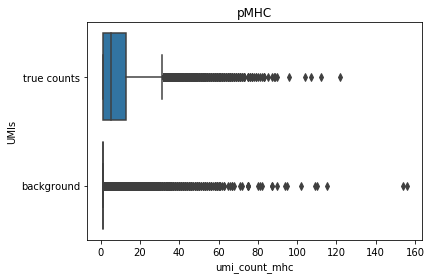

In [14]:
sns.boxplot(data=os1, x='umi_count_mhc', y='UMIs')
plt.title('pMHC')
plt.show()

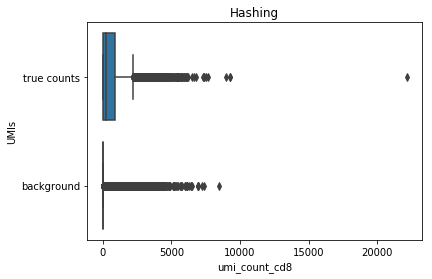

In [24]:
sns.boxplot(data=os2, x='umi_count_cd8', y='UMIs')
plt.title('Hashing')
plt.show()

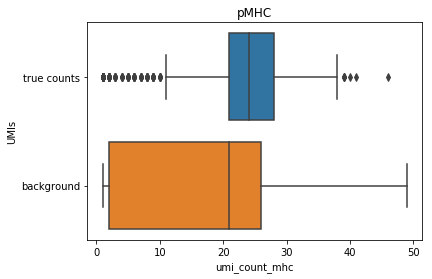

In [25]:
sns.boxplot(data=os2, x='umi_count_mhc', y='UMIs')
plt.title('pMHC')
#plt.xlim(0,20)
plt.show()

In [74]:
int(round(os2.loc[os2.UMIs == 'background', 'umi_count_mhc'].median(), 0))

21

In [14]:
os1['label_hsh'] = np.where((os1.UMIs == 'true counts') & (os1['HLA match'] != 'NA'), 1,0)
os2['label_hsh'] = np.where((os2.UMIs == 'true counts') & (os2['HLA match'] != 'NA'), 1,0)

In [36]:
dfs = list()
opt_thr = dict()
var = 'delta_umi_cd8' #umi_count_cd8
for sample, grp in os1.groupby('sample_id'):
    thresholds = np.arange(int(grp.loc[grp.label_hsh == 0, var].quantile(0.995)))
    
    print(sample, thresholds[-1])

    sensitivity = list()
    specificity = list()
    for thr in thresholds:
        TP = len(grp[(grp[var] >= thr) & (grp.label_hsh == 1)])
        FP = len(grp[(grp[var] >= thr) & (grp.label_hsh == 0)])
        FN = len(grp[(grp[var] < thr) & (grp.label_hsh == 1)])
        TN = len(grp[(grp[var] < thr) & (grp.label_hsh == 0)])

        sensitivity.append(TP/(TP + FN))
        specificity.append(TN/(TN + FP))
        
        if sensitivity[-1] < specificity[-1]:
            if sample not in opt_thr:
                print(thr)
                opt_thr[sample] = thr
        
        if thr % 100 == 0:
            print(thr, sensitivity[-1], specificity[-1])
            if sensitivity[-1] < specificity[-1]:
                break
        
    tmp = pd.DataFrame([thresholds[:thr], sensitivity, specificity], index=['threshold','sensitivity','specificity']).T
    tmp = pd.melt(tmp, id_vars='threshold',value_vars=['specificity','sensitivity'])
    tmp['sample id'] = sample
    dfs.append(tmp)

1.0 146
0 1.0 0.0
4
100 0.4982698961937716 0.9935387603992173
2.0 255
0 1.0 0.0
5
100 0.4388185654008439 0.9750788400892239
3.0 60
0 1.0 0.0
8
4.0 131
0 1.0 0.0
5
100 0.06779661016949153 0.9899884163494953
5.0 48
0 1.0 0.0
6
6.0 130
0 1.0 0.0
4
100 0.33793103448275863 0.9922774722191042
7.0 106
0 1.0 0.0
5
100 0.18775510204081633 0.9941907374536065
8.0 98
0 1.0 0.0
5
9.0 108
0 1.0 0.0
4
100 0.17920353982300885 0.9939166353736387
10.0 59
0 1.0 0.0
4


In [37]:
opt_thr

{1.0: 4,
 2.0: 5,
 3.0: 8,
 4.0: 5,
 5.0: 6,
 6.0: 4,
 7.0: 5,
 8.0: 5,
 9.0: 4,
 10.0: 4}

In [38]:
plt_df = pd.concat(dfs)

In [39]:
plt_df['sample id'] = plt_df['sample id'].astype(int)

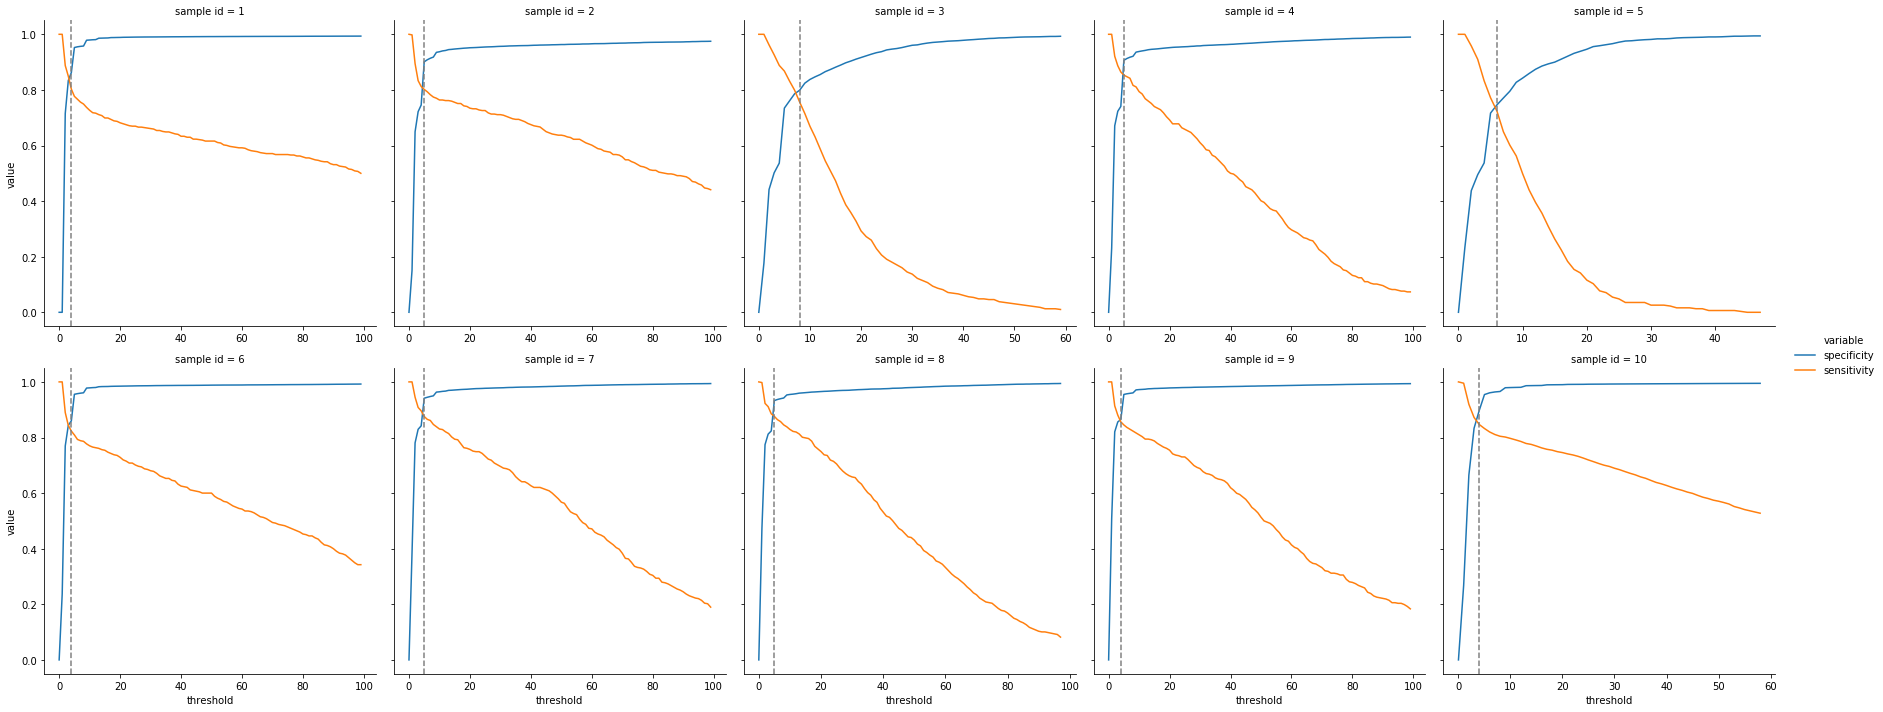

In [40]:
grid = sns.relplot(data=plt_df, x='threshold', y='value', hue='variable', col="sample id", kind='line', col_wrap=5, facet_kws={'sharex': False})
for sample, ax in enumerate(grid.axes.flat, 1):
    ax.axvline(x=opt_thr[sample], ls='--', c='grey')
plt.show()

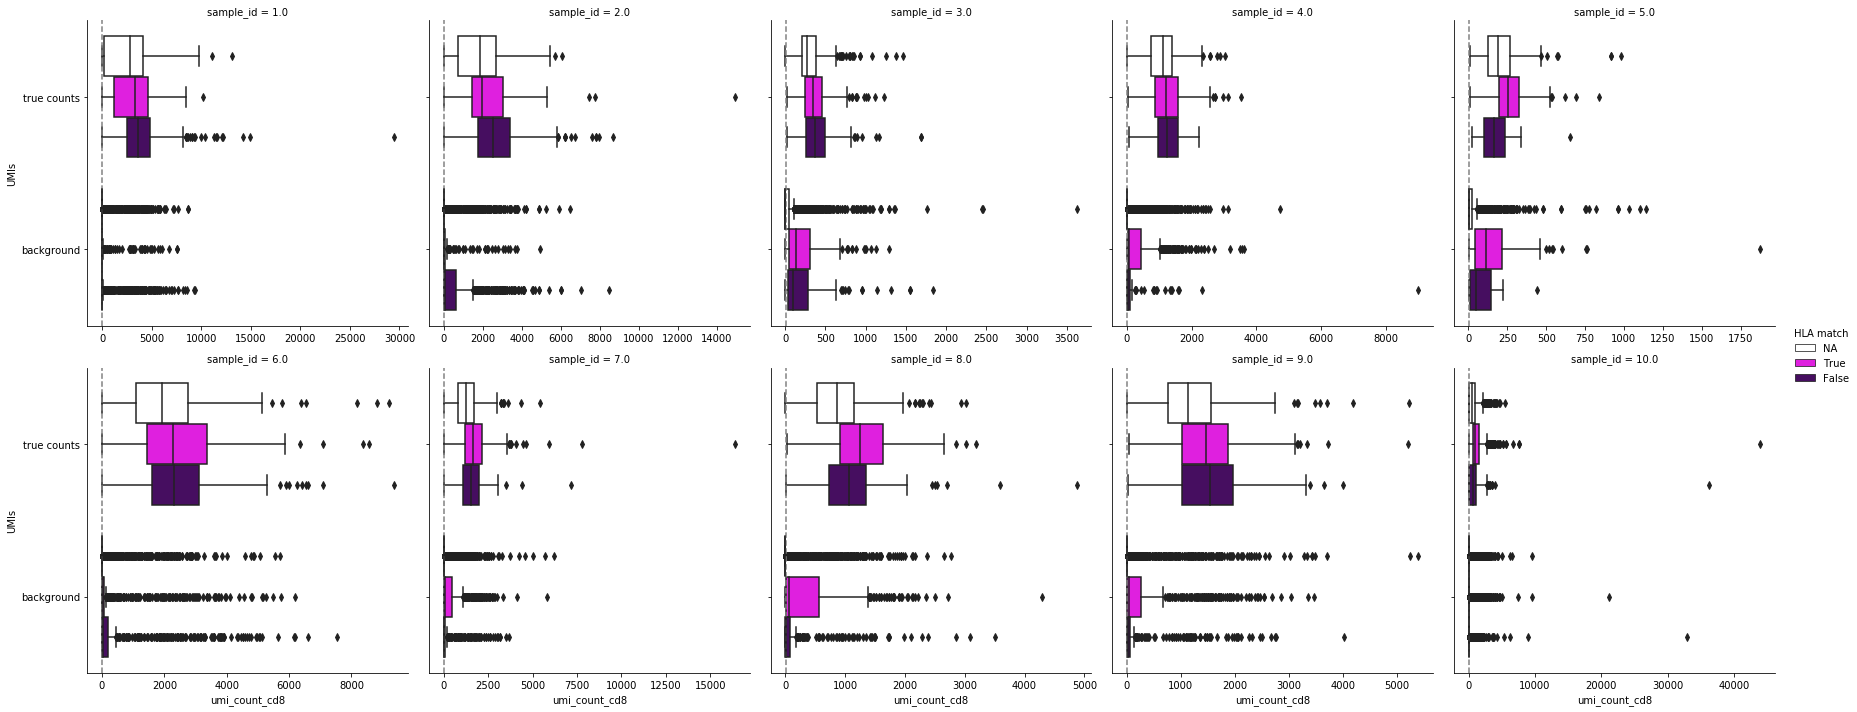

In [51]:
grid = sns.catplot(data=os1, x='umi_count_cd8', y='UMIs', hue='HLA match', col='sample_id', col_wrap=5, kind='box',sharex=False, palette=['white','magenta','#4b006e'])
for sample, ax in enumerate(grid.axes.flat, 1):
    ax.axvline(x=opt_thr[sample], ls='--', c='grey')
plt.show()

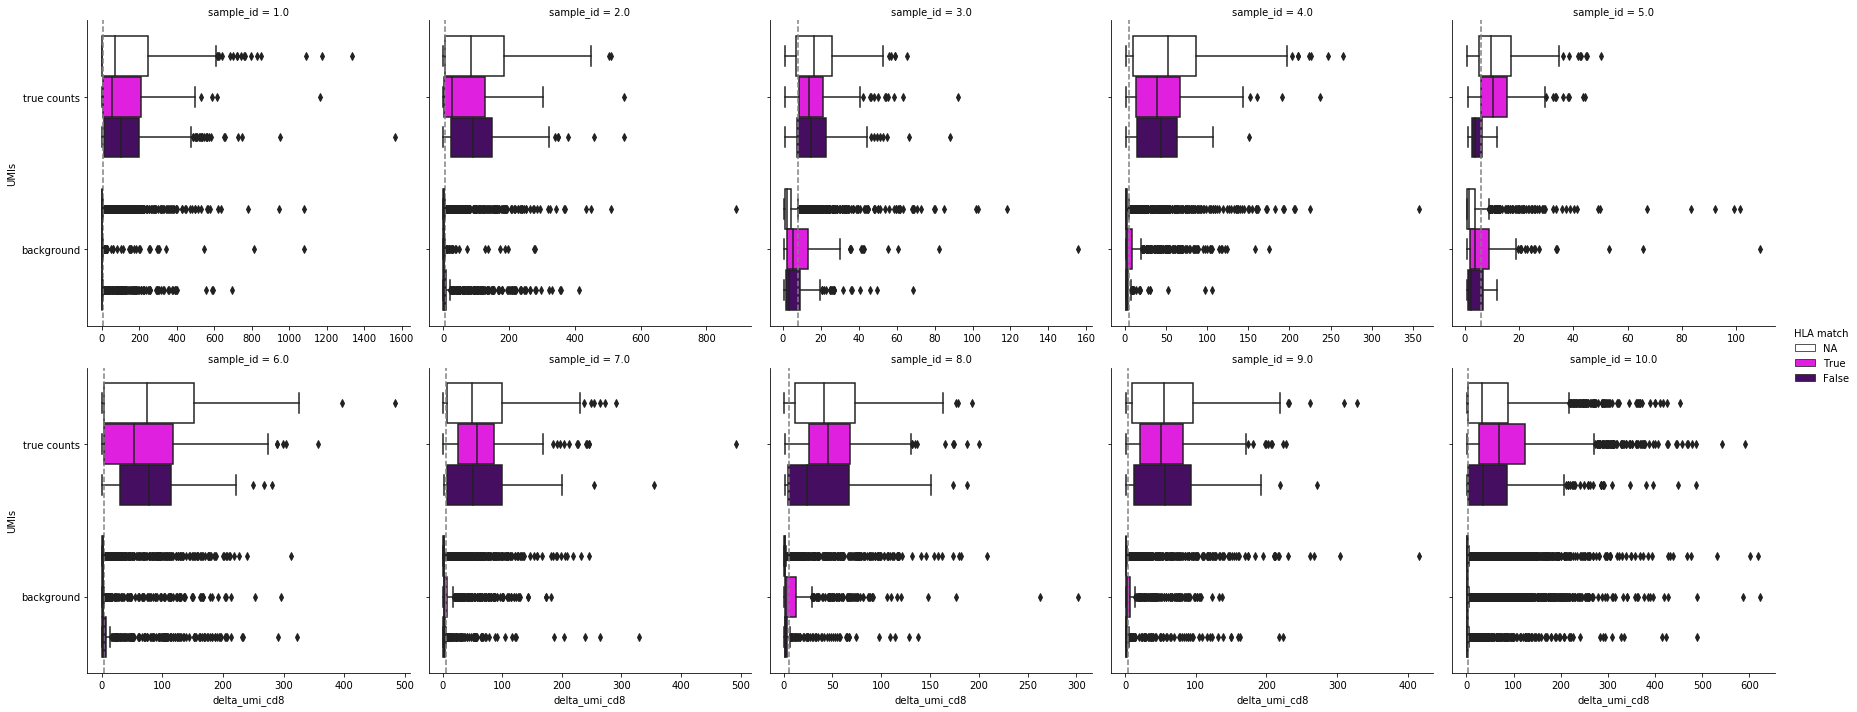

In [50]:
grid = sns.catplot(data=os1, x='delta_umi_cd8', y='UMIs', hue='HLA match', col='sample_id', col_wrap=5, kind='box',sharex=False, palette=['white','magenta','#4b006e'])
for sample, ax in enumerate(grid.axes.flat, 1):
    ax.axvline(x=opt_thr[sample], ls='--', c='grey')
plt.show()

In [45]:
opt_thr

{1.0: 4,
 2.0: 5,
 3.0: 8,
 4.0: 5,
 5.0: 6,
 6.0: 4,
 7.0: 5,
 8.0: 5,
 9.0: 4,
 10.0: 4}

In [21]:
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

In [32]:
os1['sample_cutoff_umi'] = os1.sample_id.map(opt_thr)

In [47]:
os1['sample_cutoff_delta'] = os1.sample_id.map(opt_thr)

In [48]:
a = set(os1[~os1.peptide_HLA.isna()].gem)
c = set(os1[~os1.ct.isna()].gem)
b = set(os1[~os1.sample_id.isna() & (os1[var] > os1.sample_cutoff_delta)].gem)

In [23]:
a = set(os2[~os2.peptide_HLA.isna()].gem)
c = set(os2[~os2.ct.isna()].gem)
b = set(os2[~os2.sample_id.isna() & (os2.umi_count_cd8 > os2.sample_id_cutoff)].gem)

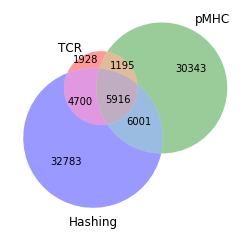

In [49]:
venn3([c,a,b], ('TCR','pMHC','Hashing'))

In [70]:
os1.loc[~os1.sample_id.isna() & (os1[var] > os1.sample_cutoff_delta) & (~os1.peptide_HLA.isna() & (os1.sample_id == 5)),
        ['peptide_HLA','HLA_cd8','HLA match','umi_count_lst_mhc','umi_count_lst_cd8',var, 'sample_cutoff_delta','sample_id_cutoff','umi_count_cd8']].tail(60)

,peptide_HLA,HLA_cd8,HLA match,umi_count_lst_mhc,umi_count_lst_cd8,delta_umi_cd8,sample_cutoff_delta,sample_id_cutoff,umi_count_cd8
30445,TPSVSSSISSL B0702,"['A0301', 'B0702']",True,[1.0],"[1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 6.0, 22.0,...",11.011236,6.0,164.0,245.0
30766,RVRAYTYSK A0301,"['A0301', 'B0702']",True,"[2.0, 53.0]","[2.0, 4.0, 4.0, 5.0, 7.0, 9.0, 12.0, 22.0, 36....",7.641379,6.0,164.0,277.0
31100,RVRAYTYSK A0301,"['A0301', 'B0702']",True,[1.0],"[1.0, 1.0, 3.0, 3.0, 4.0, 5.0, 6.0, 19.0, 155.0]",8.051948,6.0,164.0,155.0
31577,RVRAYTYSK A0301,"['A0301', 'B0702']",True,[22.0],"[1.0, 2.0, 4.0, 5.0, 5.0, 6.0, 6.0, 26.0, 159.0]",6.057143,6.0,164.0,159.0
31892,RVRAYTYSK A0301,"['A0301', 'B0702']",True,[12.0],"[2.0, 3.0, 3.0, 3.0, 4.0, 5.0, 9.0, 16.0, 19.0...",6.025974,6.0,164.0,116.0
31965,RPPIFIRRL B0702,"['A0301', 'B0702']",True,[1.0],"[2.0, 3.0, 4.0, 4.0, 4.0, 6.0, 11.0, 14.0, 17....",12.637681,6.0,164.0,218.0
32723,RPPIFIRRL B0702,"['A0301', 'B0702']",True,"[1.0, 4.0]","[3.0, 5.0, 5.0, 6.0, 7.0, 8.0, 11.0, 11.0, 47....",6.582011,6.0,164.0,311.0
32829,TPRVTGGGAM B0702,"['A0301', 'B0702']",True,[2.0],"[5.0, 5.0, 6.0, 7.0, 8.0, 8.0, 15.0, 16.0, 36....",7.062069,6.0,164.0,256.0
33406,YVLDHLIVV A0201,"['A0301', 'B0702']",False,[1.0],"[2.0, 2.0, 4.0, 4.0, 5.0, 11.0, 12.0, 16.0, 20...",6.765432,6.0,164.0,137.0
33597,RPPIFIRRL B0702,"['A0301', 'B0702']",True,"[1.0, 1.0, 2.0]","[1.0, 1.0, 1.0, 3.0, 4.0, 6.0, 9.0, 10.0, 252.0]",24.585366,6.0,164.0,252.0


In [57]:
var

'delta_umi_cd8'

In [25]:
lol = os2.copy()
lol['umi_count_cd8'] = np.where(os2.umi_count_cd8 > 10000, 10000, os2.umi_count_cd8)
#lol.sample_id = lol.fillna(0).sample_id.astype(int).astype(str)

In [54]:
opt_thr

{1.0: 42,
 2.0: 366,
 3.0: 212,
 4.0: 290,
 5.0: 164,
 6.0: 63,
 7.0: 158,
 8.0: 207,
 9.0: 243,
 10.0: 24}

In [55]:
hsh_thr = {'1':1900, '2':1100, '4':700,'6':1200,'7':1000,'8':700,'9':900,'10':500}

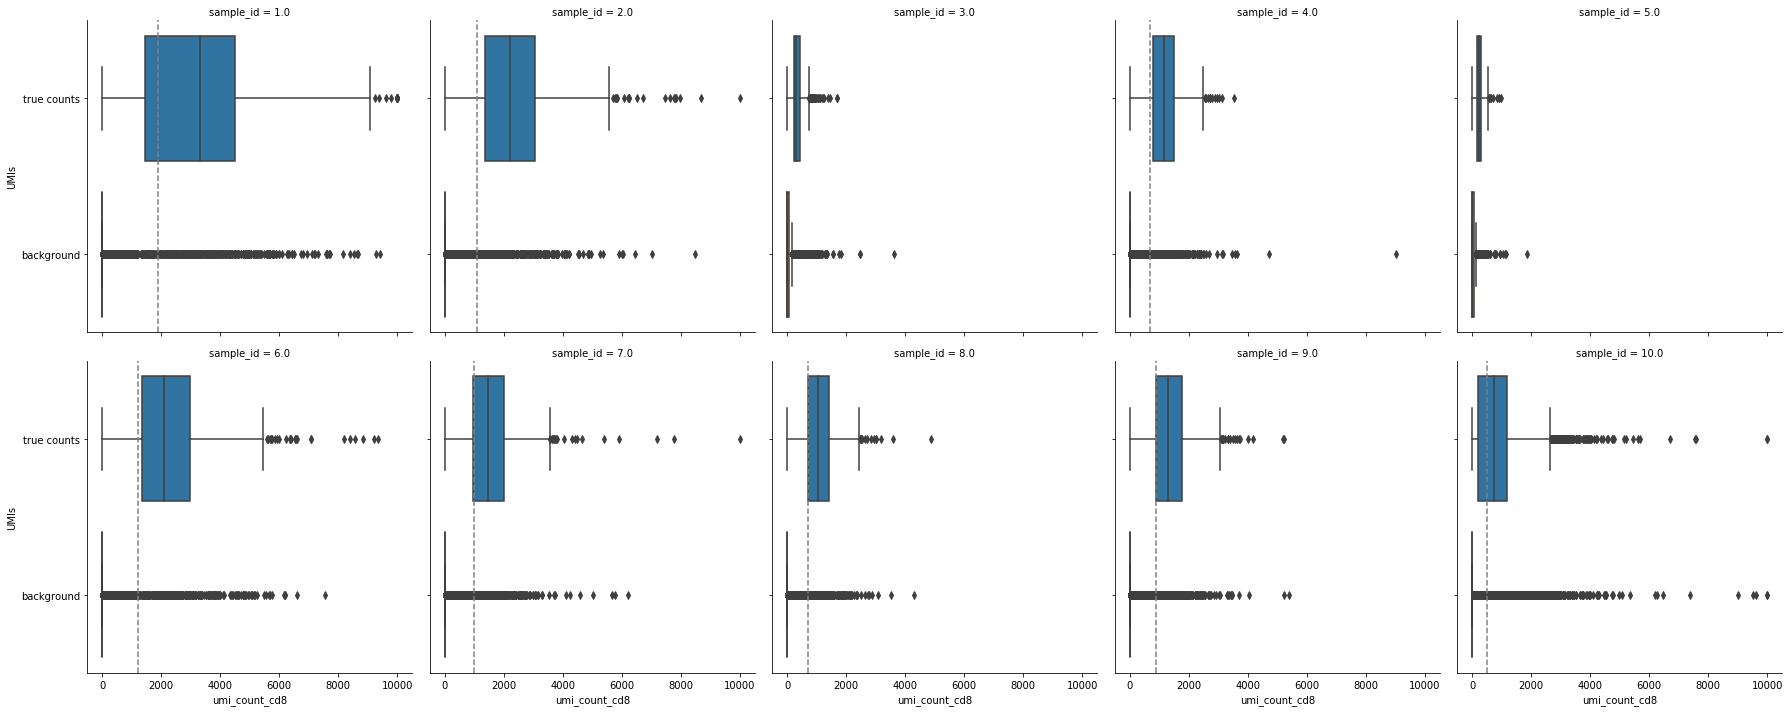

In [56]:
grid = sns.catplot(data=lol, x='umi_count_cd8', y='UMIs', col='sample_id', col_wrap=5, kind='box')
for sample, ax in enumerate(grid.axes.flat, 1):
    if str(sample) not in hsh_thr:
        continue
    ax.axvline(x=hsh_thr[str(sample)], ls='--', c='grey')
plt.show()

In [62]:
lol.dropna(subset=['umi_count_cd8']).sample_id.value_counts()

10    505635
1      71617
6      44980
9      27082
7      25278
8      15402
2      13475
4      12440
3       3915
5       2210
Name: sample_id, dtype: int64

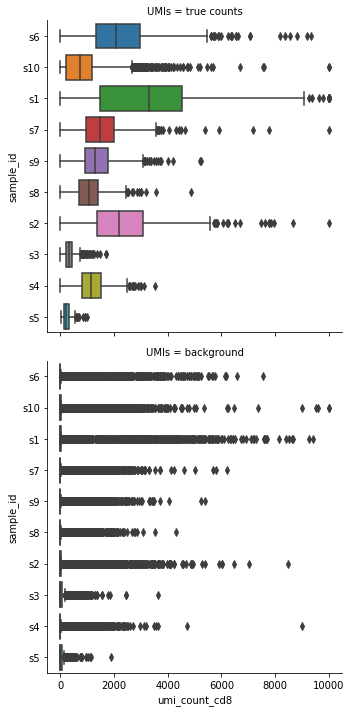

In [72]:
#lol.sample_id = 's' + lol.fillna(0).sample_id.astype(int).astype(str)
sns.catplot(data=lol.dropna(subset=['umi_count_cd8']), x='umi_count_cd8',y='sample_id', row='UMIs', kind='box')

In [234]:
os2[~((os2['HLA match'] != 'NA') & (os2.UMIs == 'true counts')) & (os2.sample_id==1)].umi_count_cd8.quantile(0.995)

2842.0

In [236]:
int(os2[(os2.label_hsh==0) & (os2.sample_id==1)].umi_count_cd8.quantile(0.995))

2842

In [128]:
sensitivity = list()
specificity = list()
for thr in range(int(os2.umi_count_mhc.max())):
    print(thr)
    TP = len(os2[(os2.umi_count_mhc >= thr) & (os2.UMIs == 'true counts')])
    FP = len(os2[(os2.umi_count_mhc >= thr) & (os2.UMIs == 'background')])
    FN = len(os2[(os2.umi_count_mhc < thr) & (os2.UMIs == 'true counts')])
    TN = len(os2[(os2.umi_count_mhc < thr) & (os2.UMIs == 'background')])
    
    sensitivity.append(TP/(TP + FN))
    specificity.append(TN/(TN + FP))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [129]:
os2_mhc_thr = pd.DataFrame([np.arange(int(os2.umi_count_mhc.max())), sensitivity, specificity], index=['threshold','sensitivity','specificity']).T

In [130]:
os2_mhc_thr

,threshold,sensitivity,specificity
0,0.0,1.000000,0.000000
1,1.0,1.000000,0.000000
2,2.0,0.964727,0.247312
3,3.0,0.954650,0.278529
4,4.0,0.950069,0.291710
5,5.0,0.946862,0.300382
6,6.0,0.940907,0.308012
7,7.0,0.934952,0.314950
8,8.0,0.929913,0.319459
9,9.0,0.924416,0.322581


In [131]:
plt_df = pd.melt(os2_mhc_thr, id_vars='threshold',value_vars=['specificity','sensitivity'])

In [132]:
plt_df['source'] = '2OS'
plt_df['barcode'] = 'pMHC'

In [133]:
plt_df

,threshold,variable,value,source,barcode
0,0.0,specificity,0.000000,2OS,pMHC
1,1.0,specificity,0.000000,2OS,pMHC
2,2.0,specificity,0.247312,2OS,pMHC
3,3.0,specificity,0.278529,2OS,pMHC
4,4.0,specificity,0.291710,2OS,pMHC
...,...,...,...,...,...
93,44.0,sensitivity,0.000458,2OS,pMHC
94,45.0,sensitivity,0.000458,2OS,pMHC
95,46.0,sensitivity,0.000458,2OS,pMHC
96,47.0,sensitivity,0.000000,2OS,pMHC


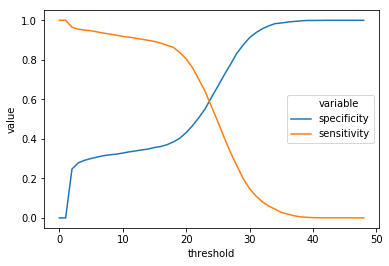

In [134]:
sns.lineplot(data=plt_df, x='threshold', y='value', hue='variable')
plt.show()

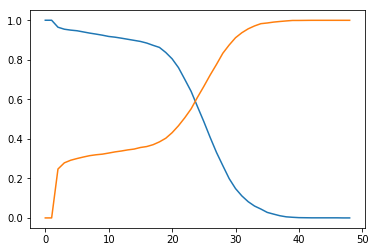

In [135]:
x = np.arange(int(os2.umi_count_mhc.max()))
plt.plot(x, sensitivity)
plt.plot(x, specificity)
plt.show()

In [194]:
int(grp[grp.label==0].umi_count_cd8.quantile(0.98))

54

In [11]:
os1.fillna({'umi_count_mhc':0, 'delta_umi_mhc':0,
            'umi_count_TRA':0, 'delta_umi_TRA':0,
            'umi_count_TRB':0, 'delta_umi_TRB':0,
            'v_gene_TRA':'', 'j_gene_TRA':'', 'cdr3_TRA':'',
            'v_gene_TRB':'', 'j_gene_TRB':'', 'cdr3_TRB':''}, inplace=True)
os2.fillna({'umi_count_mhc':0, 'delta_umi_mhc':0,
            'umi_count_TRA':0, 'delta_umi_TRA':0,
            'umi_count_TRB':0, 'delta_umi_TRB':0,
            'v_gene_TRA':'', 'j_gene_TRA':'', 'cdr3_TRA':'',
            'v_gene_TRB':'', 'j_gene_TRB':'', 'cdr3_TRB':''}, inplace=True)

In [17]:
os1['clone'] = os1.v_gene_TRA + ";" + os1.j_gene_TRA + ";" + os1.cdr3_TRA + "|" + os1.v_gene_TRB + ";" + os1.j_gene_TRB + ";" + os1.cdr3_TRB
os2['clone'] = os2.v_gene_TRA + ";" + os2.j_gene_TRA + ";" + os2.cdr3_TRA + "|" + os2.v_gene_TRB + ";" + os2.j_gene_TRB + ";" + os2.cdr3_TRB

In [26]:
df = pd.merge(os1, os2, suffixes=['_1os','_2os'], on=['clone','peptide_HLA'], how='inner')

In [27]:
df.fillna({'umi_count_mhc':0, 'delta_umi_mhc':0,
            'umi_count_TRA':0, 'delta_umi_TRA':0,
            'umi_count_TRB':0, 'delta_umi_TRB':0,
            'v_gene_TRA':'', 'j_gene_TRA':'', 'cdr3_TRA':'',
            'v_gene_TRB':'', 'j_gene_TRB':'', 'cdr3_TRB':'',
           'clone':'', 'peptide_HLA':''}, inplace=True)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.groupby(['clone','peptide_HLA']).umi_count_mhc_1os.apply(list)

clone                                                                          peptide_HLA      
TRAV1-1;TRAJ10;CAVRAITGGGNKLTF|TRBV5-1;TRBJ2-5;CASSPSSEEGQETQYF                RPHERNGFTVL B0702                                                [6.0]
TRAV1-1;TRAJ10;CAVRAITGGGNKLTF|TRBV5-1;TRBJ2-5;CASSTPSDTSQETQYF                RPHERNGFTVL B0702                                                [5.0]
TRAV1-1;TRAJ10;CAVRAITGGGNKLTF|TRBV5-1;TRBJ2-5;CASSTPSSGPQETQYF                                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                                                               RPHERNGFTVL B0702    [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...
                                                                               RVRAYTYSK A0301      [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 2.0, 2.0, 2.0, ...
                                                                                                                          ...                        
TRA

In [32]:
df.set_index(['clone','peptide_HLA'])[['umi_count_mhc_1os','umi_count_mhc_2os','umi_count_cd8_1os','umi_count_cd8_2os']].tail(60)

,,umi_count_mhc_1os,umi_count_mhc_2os,umi_count_cd8_1os,umi_count_cd8_2os
clone,peptide_HLA,,,,
TRAV12-2;TRAJ42;CAVWMNYGGSQGNLIF|TRBV19;TRBJ2-1;CASSMLSGPYNEQFF,,0.0,0.0,1079.0,9.0
TRAV13-1;TRAJ6;CAASEEASGGSYIPTF|TRBV7-6;TRBJ1-6;CASSLTGSDSPLHF,,0.0,0.0,620.0,1.0
TRAV12-3;TRAJ31;CAMSPMGYARLMF|TRBV4-3;TRBJ2-7;CASSQGVGTGSYEQYF,,0.0,0.0,1623.0,2.0
TRAV9-2;TRAJ49;CALSVSNQFYF|TRBV4-1;TRBJ2-1;CASSRDRSSYNEQFF,VLEETSVML A0201,8.0,21.0,716.0,624.0
TRAV1-2;TRAJ33;CASLDSNYQLIW|TRBV20-1;TRBJ2-2;CSARELAGGRDTGELFF,,0.0,0.0,1395.0,4.0
TRAV12-3;TRAJ50;CAMKTSYDKVIF|TRBV25-1;TRBJ2-3;CASSVGDTQYF,,0.0,0.0,736.0,1.0
TRAV26-2;TRAJ37;CILIRRRGSSNTGKLIF|TRBV13;TRBJ2-2;CASSFLSTGELFF,,0.0,0.0,63.0,15.0
TRAV13-1;TRAJ48;CAASVFGNEKLTF|TRBV6-2;TRBJ2-1;CASLGLAGVNEQFF,,0.0,0.0,66.0,2.0
TRAV1-2;TRAJ33;CAVRDSNYQLIW|TRBV4-3;TRBJ2-6;CASSQDAGSGANVLTF,,0.0,0.0,1656.0,1.0


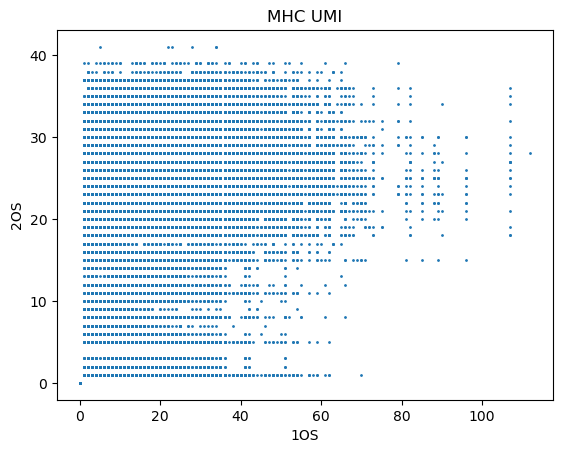

In [30]:
plt.scatter(df.umi_count_mhc_1os, df.umi_count_mhc_2os, s=1)
plt.xlabel('1OS')
plt.ylabel('2OS')
plt.title('MHC UMI')
plt.show()

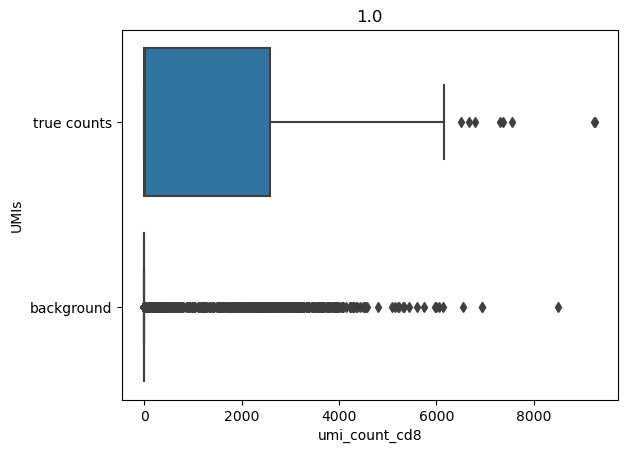

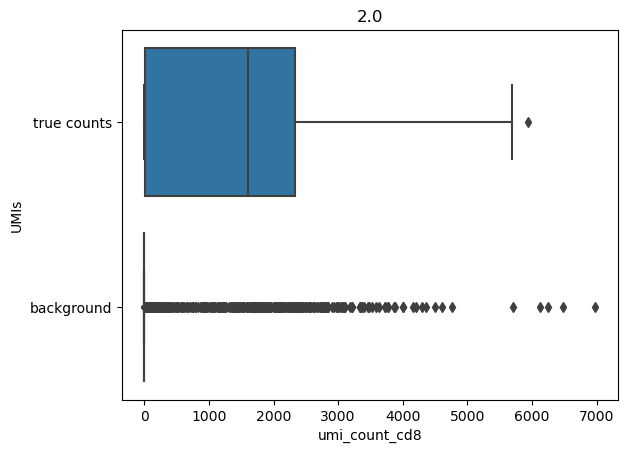

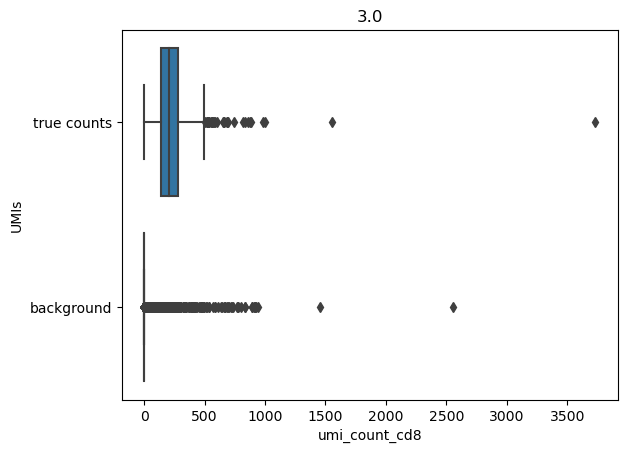

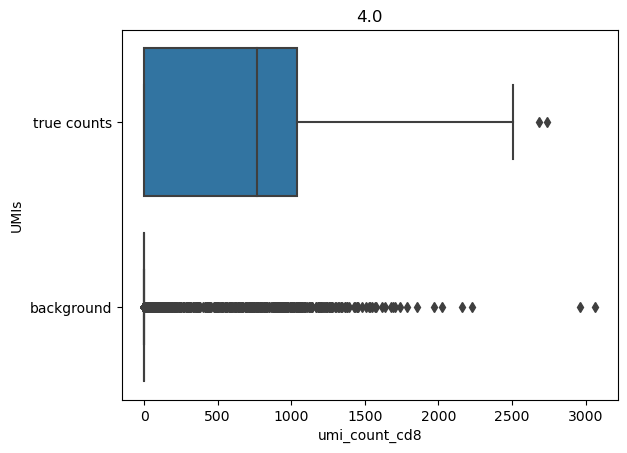

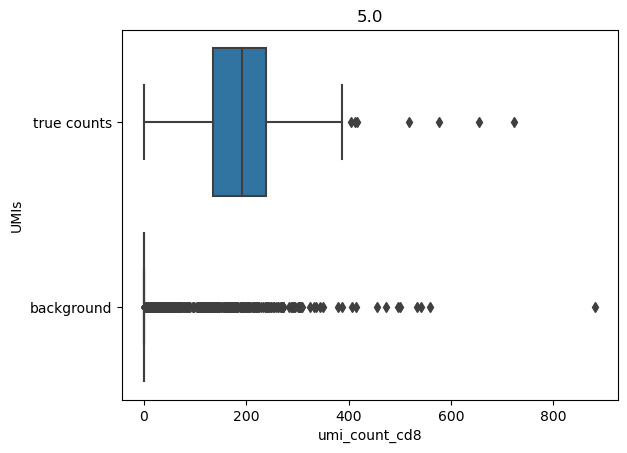

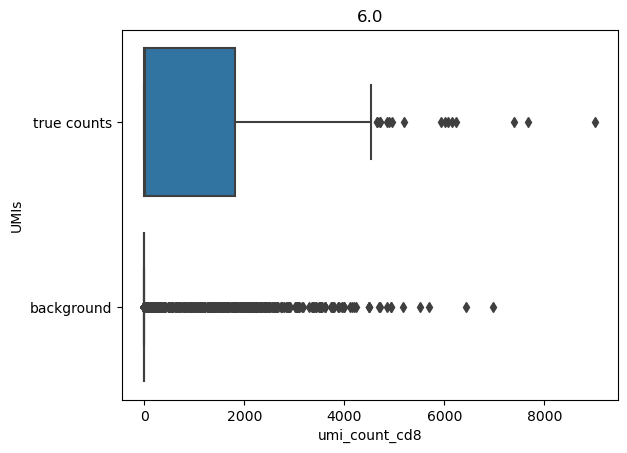

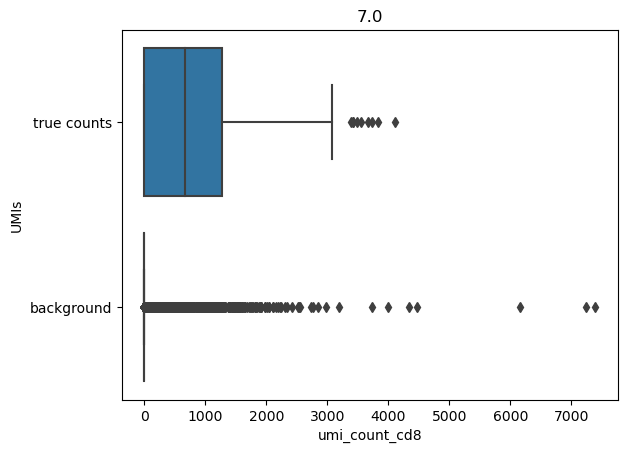

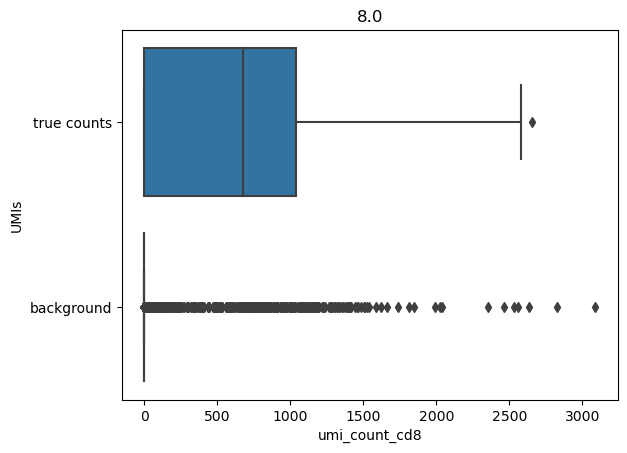

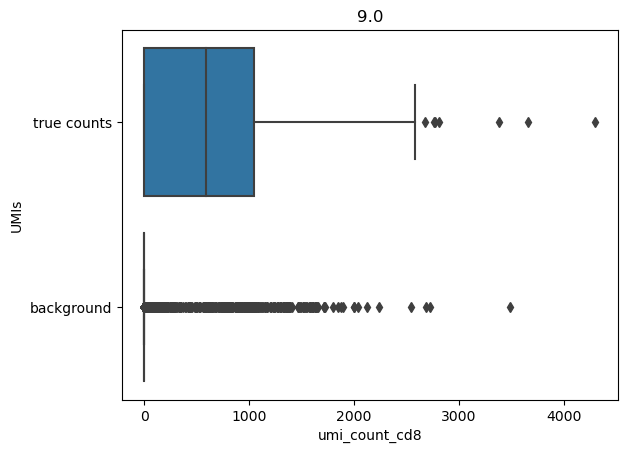

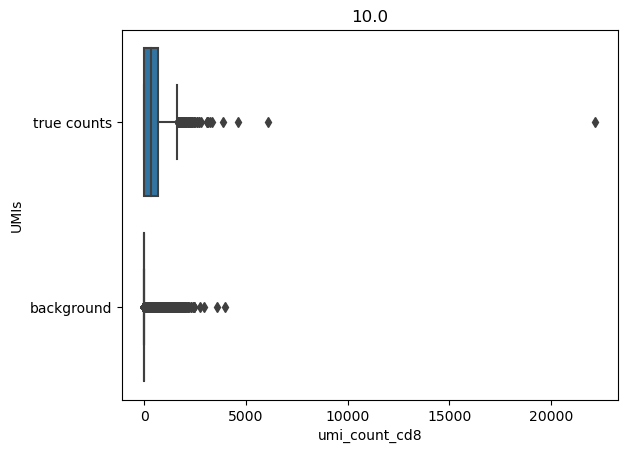

In [36]:
for sample, grp in os2.groupby('sample_id'):
    #sns.histplot(data=grp, x='umi_count_mhc', hue='UMIs', bins=int(grp.umi_count_mhc.max())+1)
    sns.boxplot(data=grp, x='umi_count_cd8', y='UMIs')
    plt.title(sample)
    plt.show()

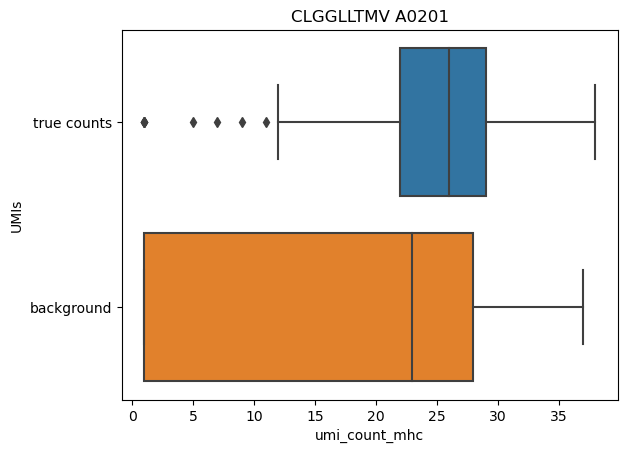

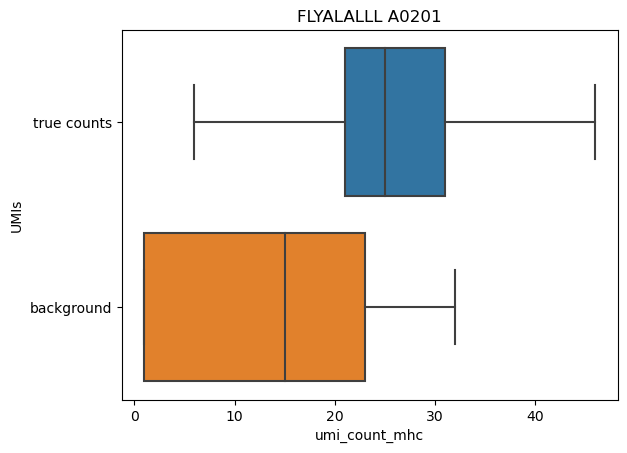

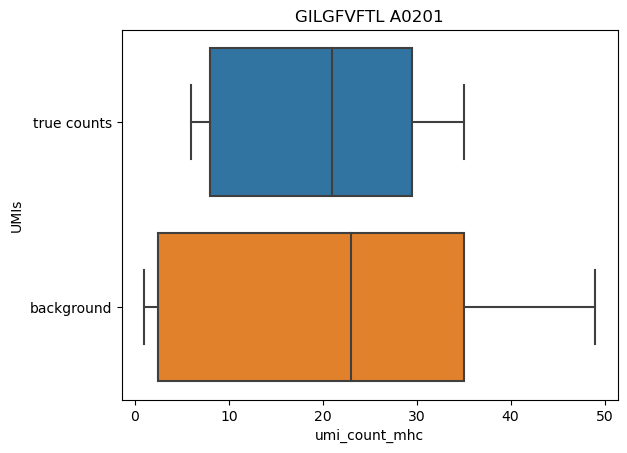

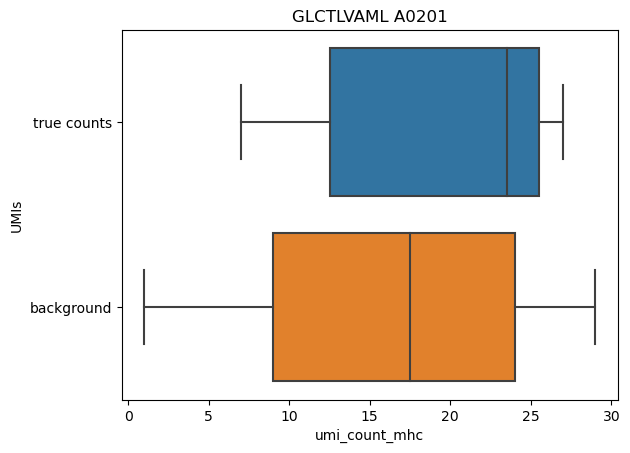

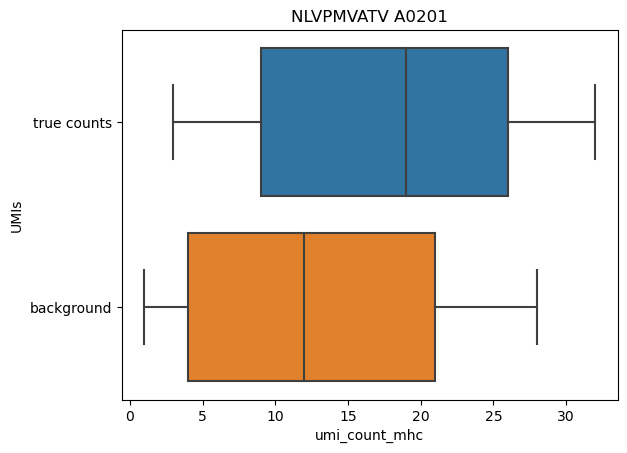

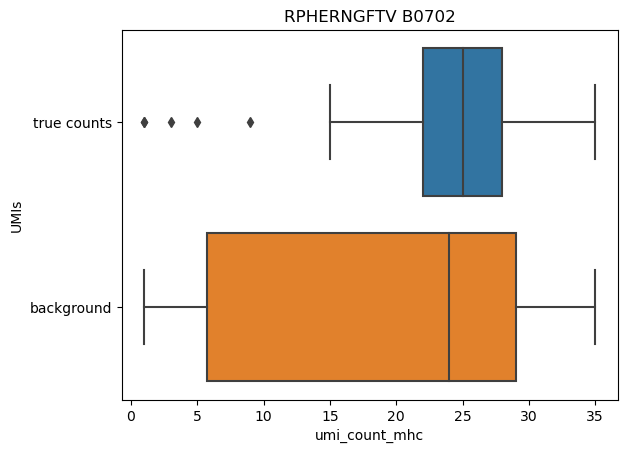

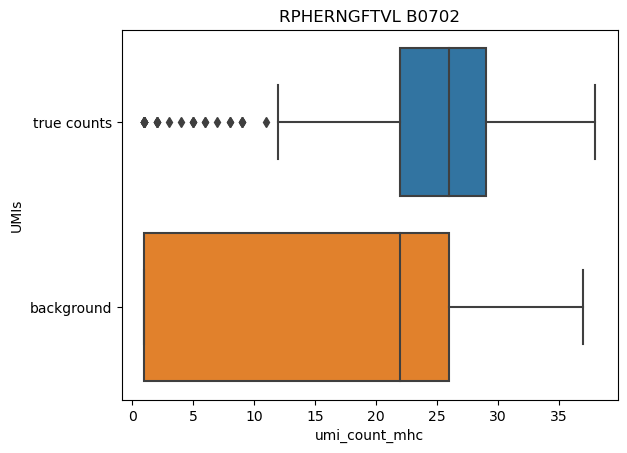

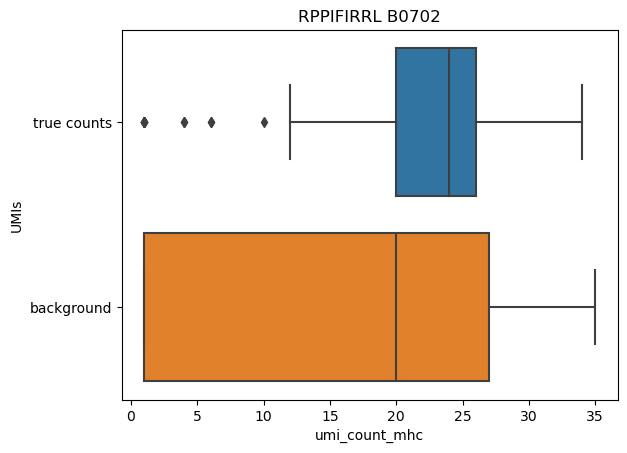

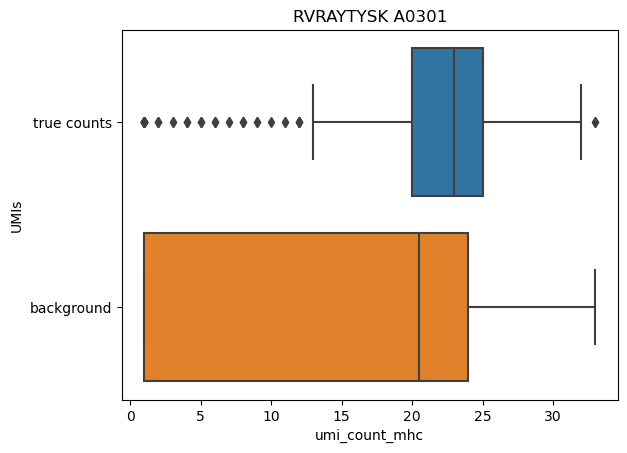

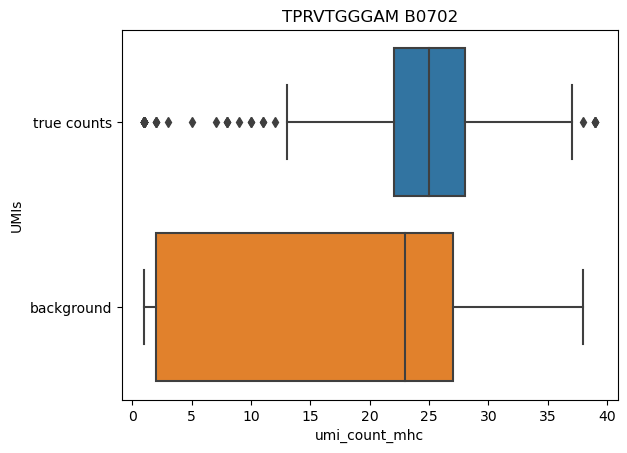

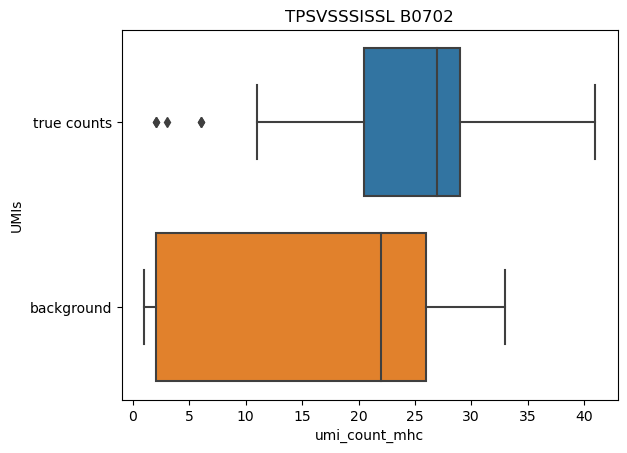

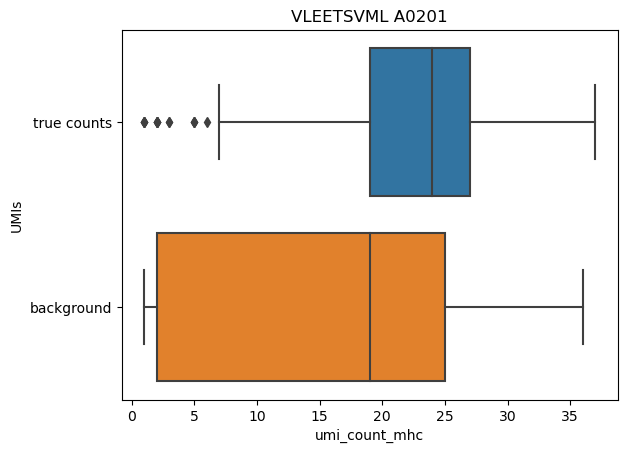

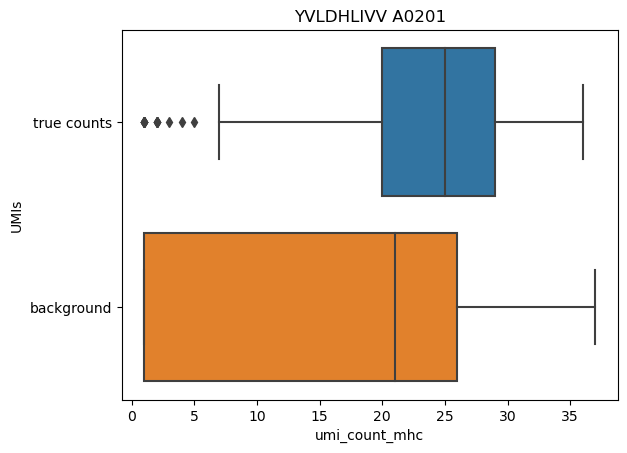

In [37]:
for pep, grp in os2.groupby('peptide_HLA'):
    #sns.histplot(data=grp, x='umi_count_mhc', hue='UMIs', bins=int(grp.umi_count_mhc.max())+1)
    sns.boxplot(data=grp, x='umi_count_mhc', y='UMIs')
    plt.title(pep)
    plt.show()

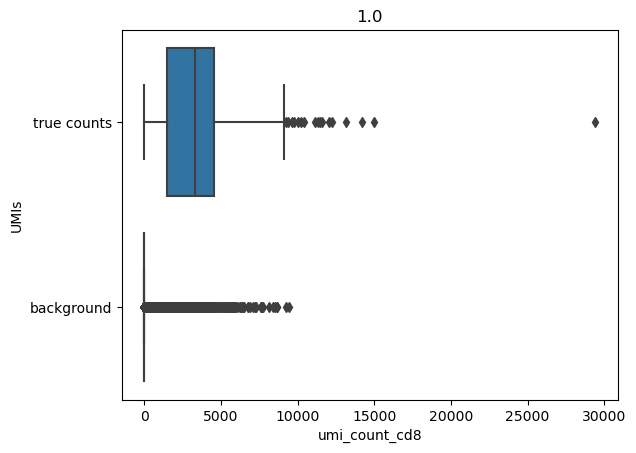

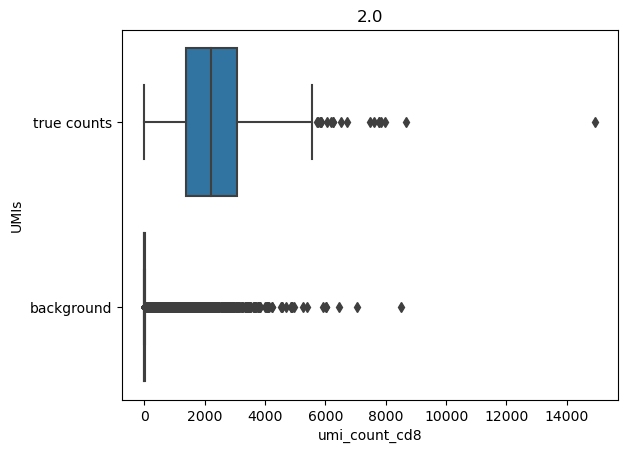

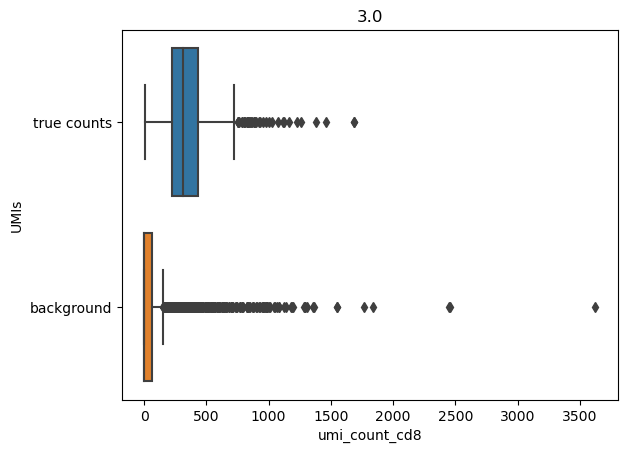

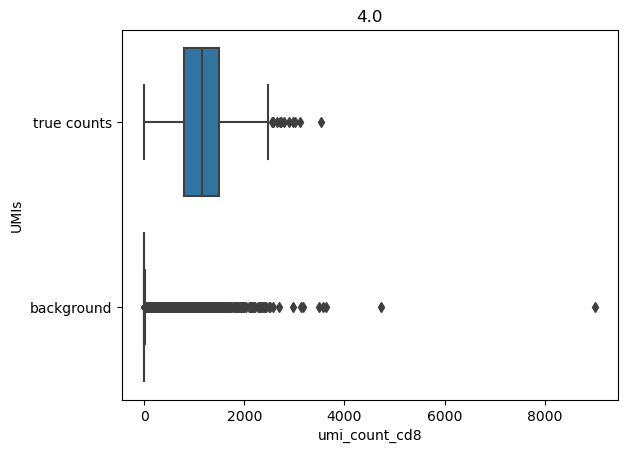

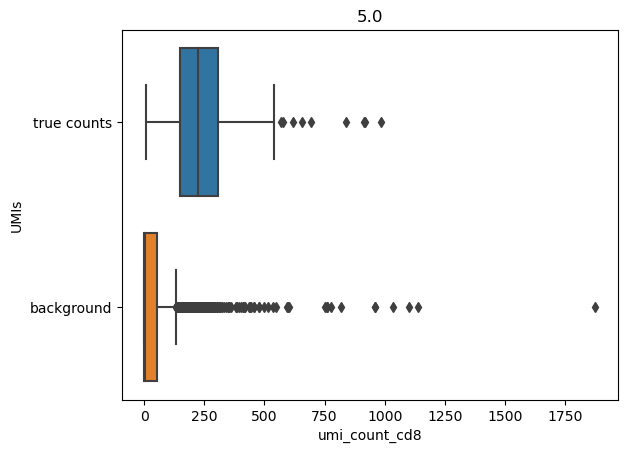

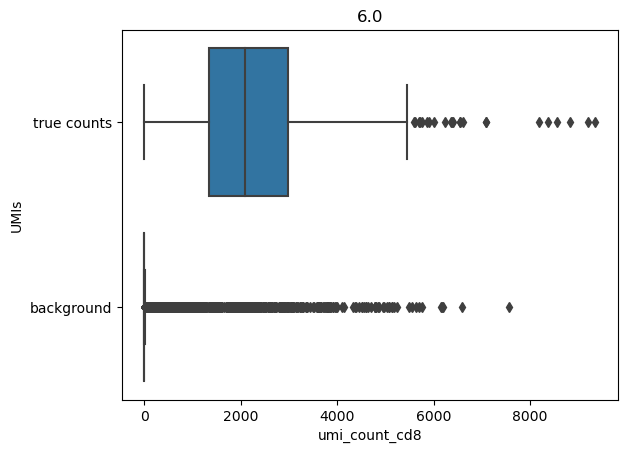

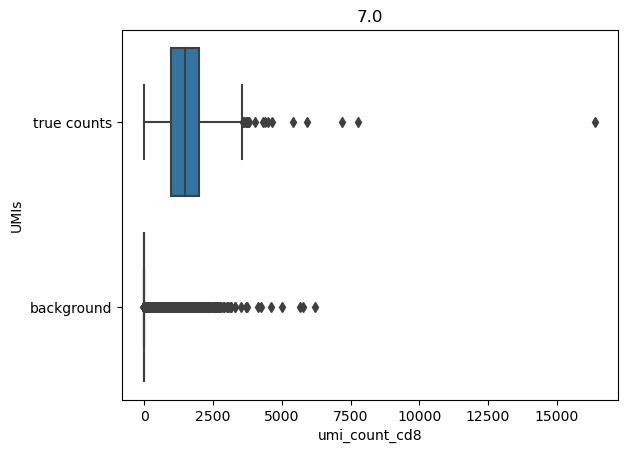

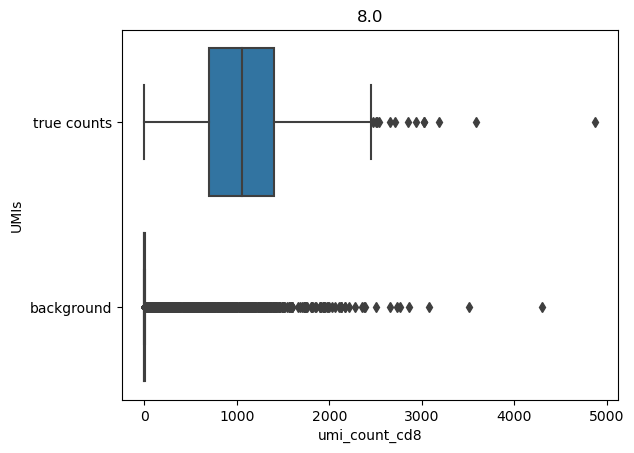

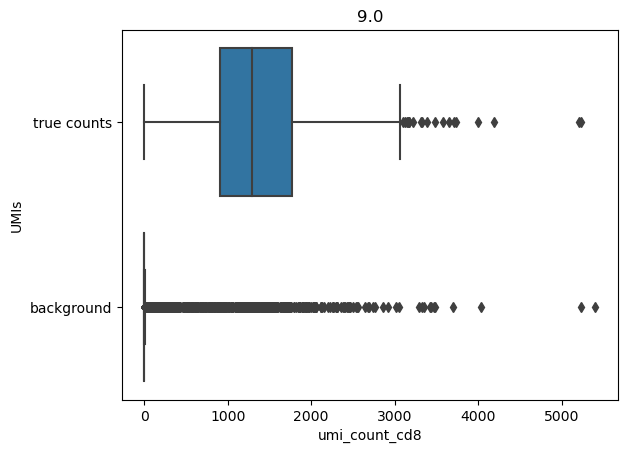

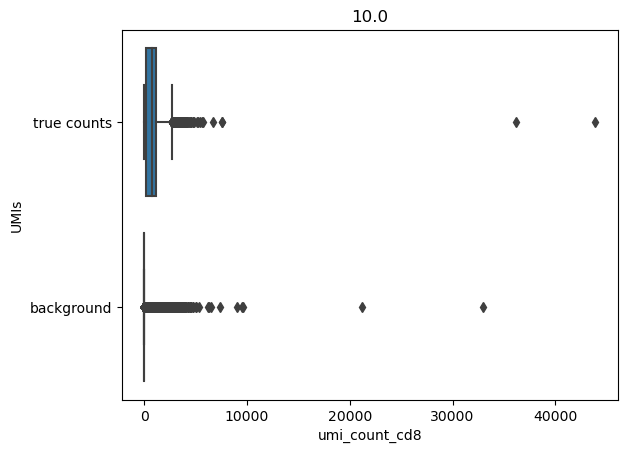

In [32]:
for sample, grp in os1.groupby('sample_id'):
    #sns.histplot(data=grp, x='umi_count_mhc', hue='UMIs', bins=int(grp.umi_count_mhc.max())+1)
    sns.boxplot(data=grp, x='umi_count_cd8', y='UMIs')
    #plt.ylim(0,6000)
    plt.title(sample)
    plt.show()
    #print(grp[grp.UMIs == 'background'].umi_count_cd8.max())

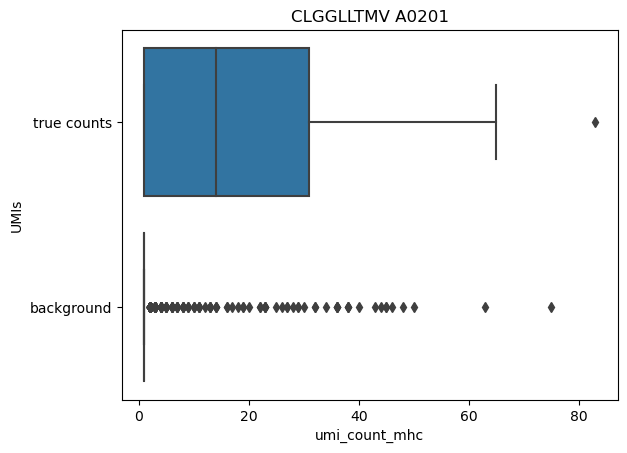

75.0


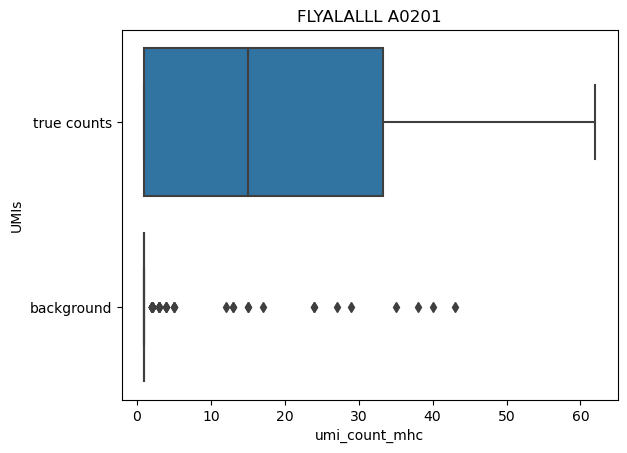

43.0


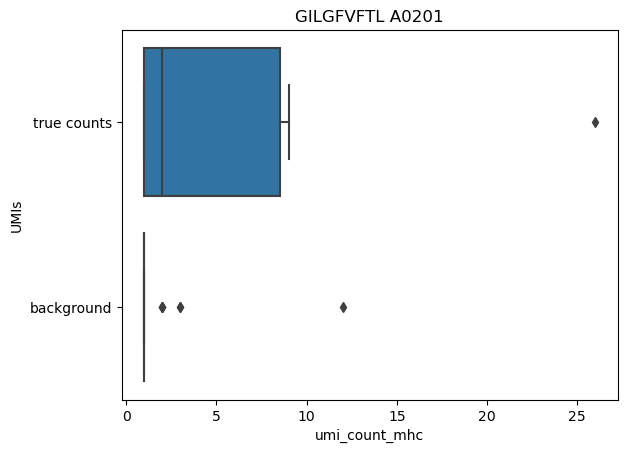

12.0


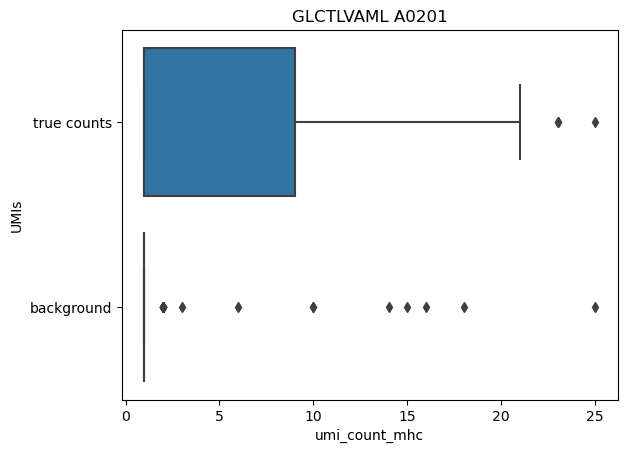

25.0


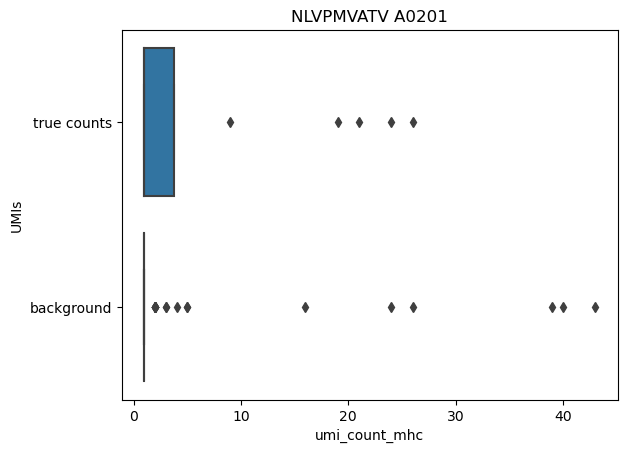

43.0


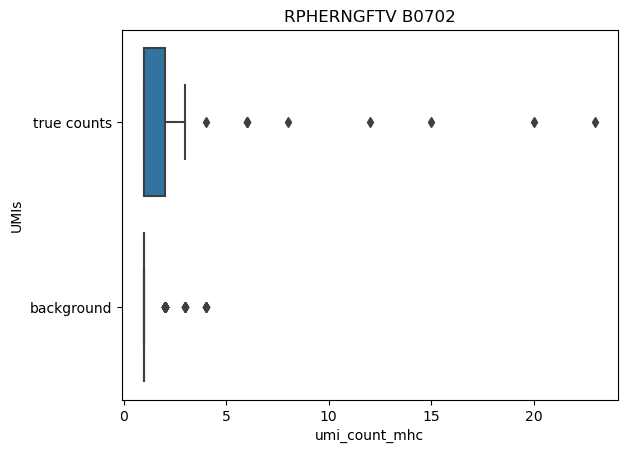

4.0


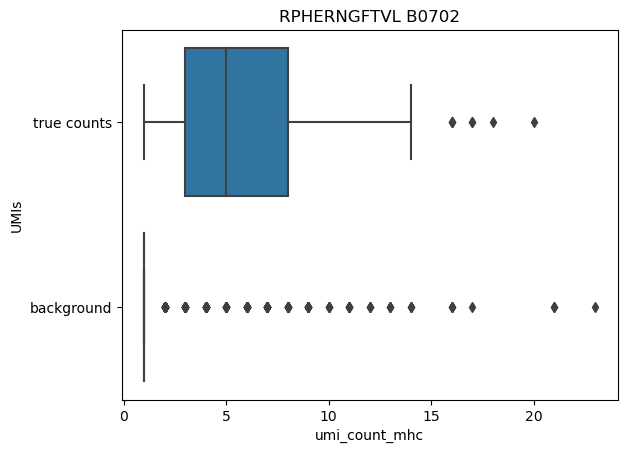

23.0


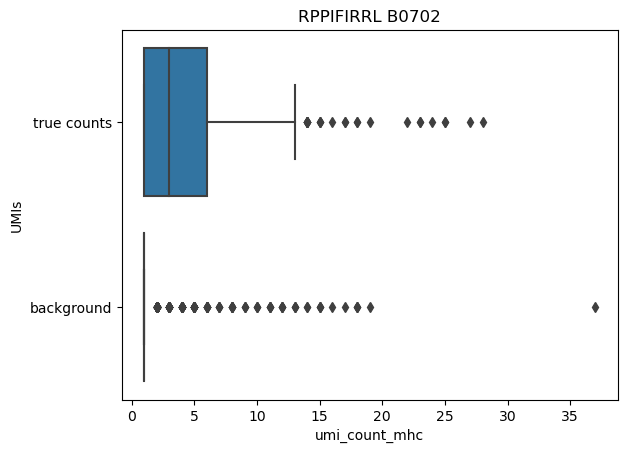

37.0


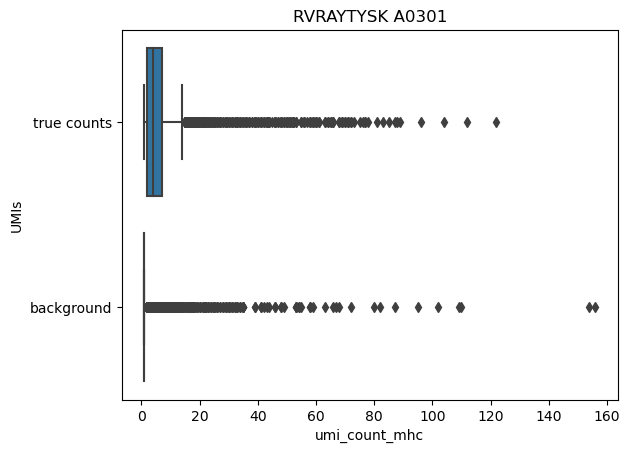

156.0


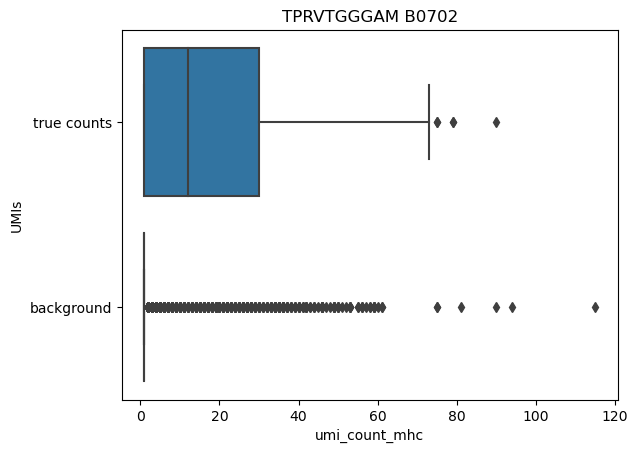

115.0


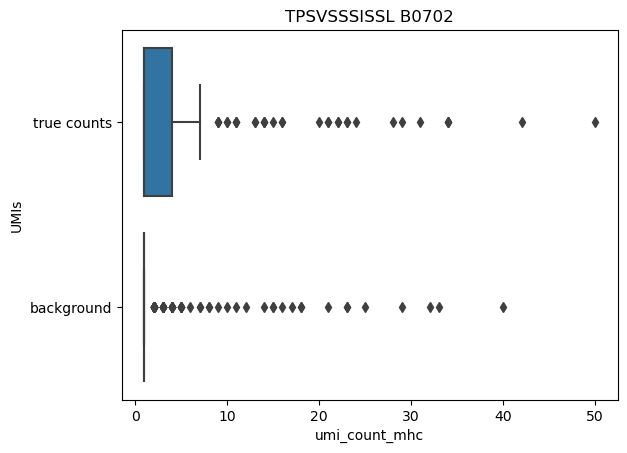

40.0


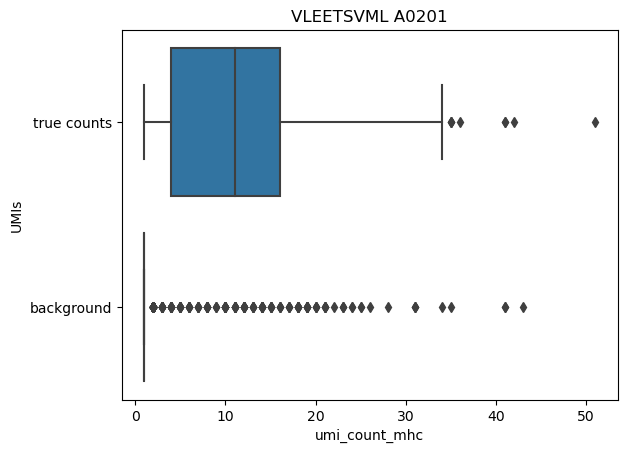

43.0


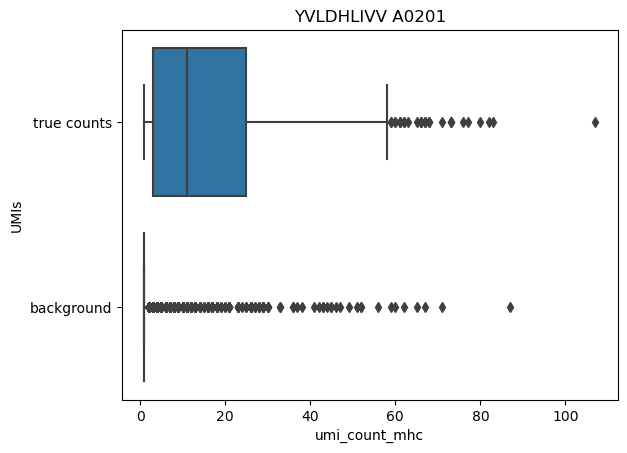

87.0


In [31]:
for pep, grp in os1.groupby('peptide_HLA'):
    #sns.histplot(data=grp, x='umi_count_mhc', hue='UMIs', bins=int(grp.umi_count_mhc.max())+1)
    sns.boxplot(data=grp, x='umi_count_mhc', y='UMIs')
    #plt.ylim(0,6000)
    plt.title(pep)
    plt.show()
    print(grp[grp.UMIs == 'background'].umi_count_mhc.max())

In [27]:
grp.umi_count_mhc.max()

83.0

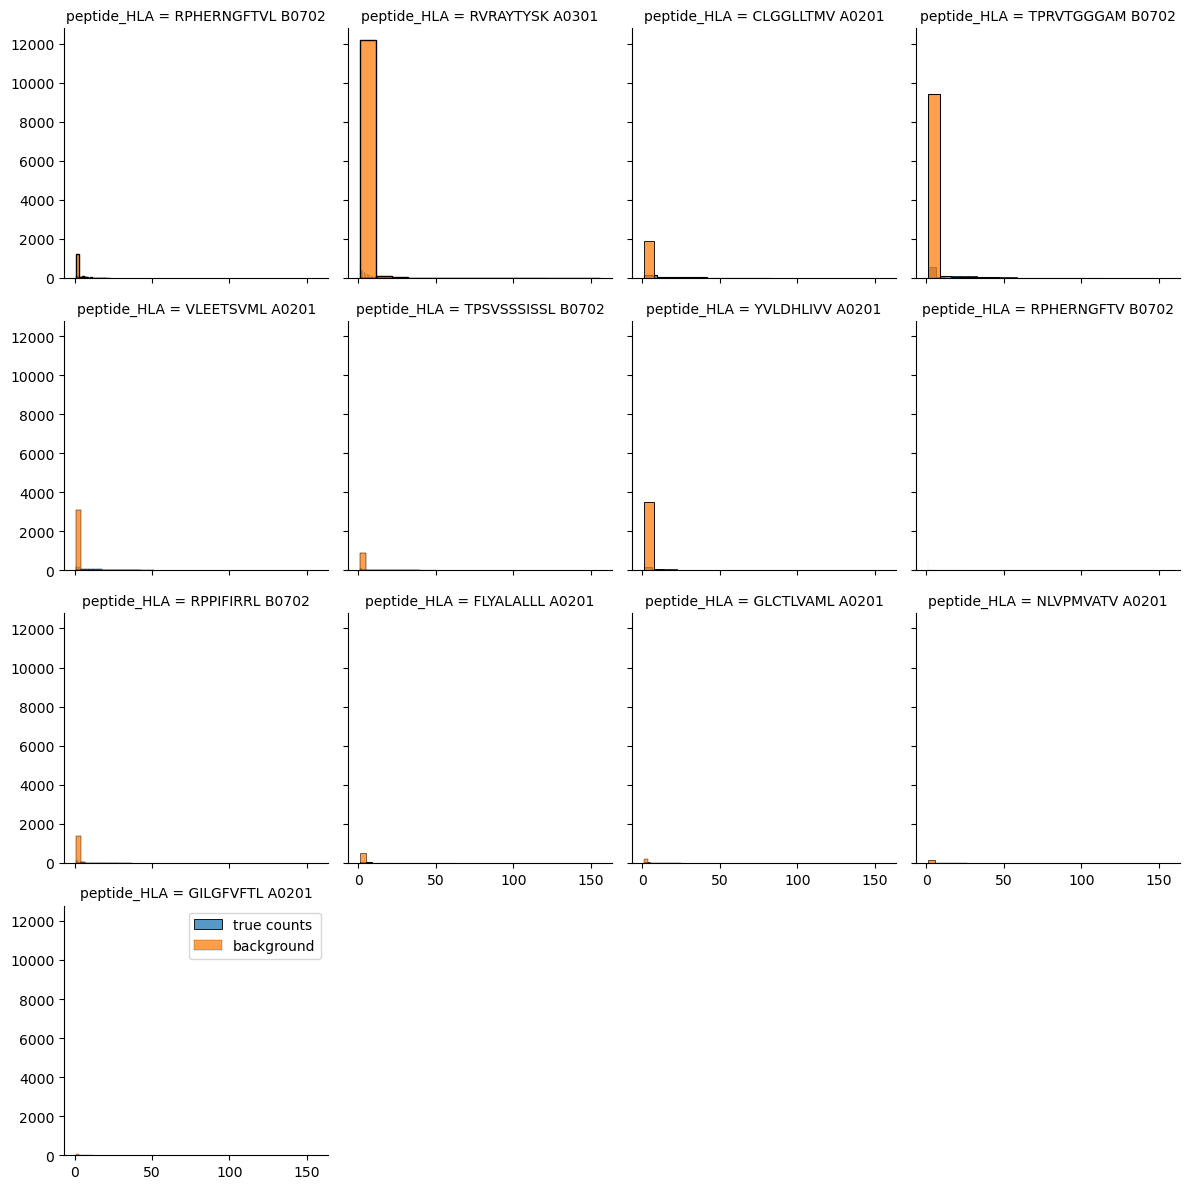

In [24]:
g = sns.FacetGrid(os1, col="peptide_HLA", col_wrap=4, hue='UMIs')
g.map_dataframe(sns.histplot, x="umi_count_mhc")
plt.legend()
plt.show()

In [20]:
sns.distplot(os1, x='umi_count_mhc', hue='UMIs', col='peptide_HLA', col_wrap=5) #,row='HLA_mhc'

TypeError: distplot() got an unexpected keyword argument 'hue'

In [ ]:
sns.histplot(data=os1, x='umi_count_cd8', hue='UMIs')
plt.show()

In [15]:
os1.umi_count_cd8.value_counts().index.max()

43886.0

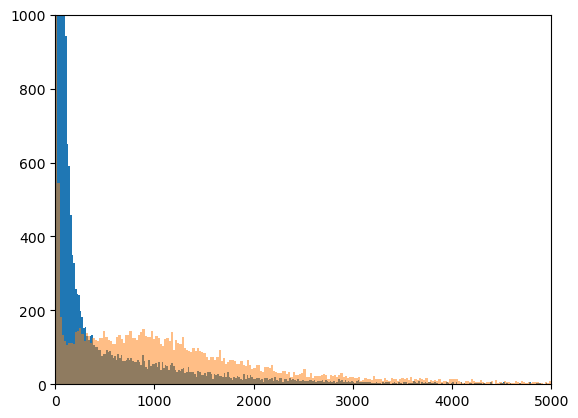

In [18]:
plt.hist(os1[os1.UMIs != 'true counts'].umi_count_cd8, bins=2000)
plt.hist(os1[os1.UMIs == 'true counts'].umi_count_cd8, bins=2000, alpha=0.5)
plt.ylim(0,1000)
plt.xlim(0,5000)
plt.show()

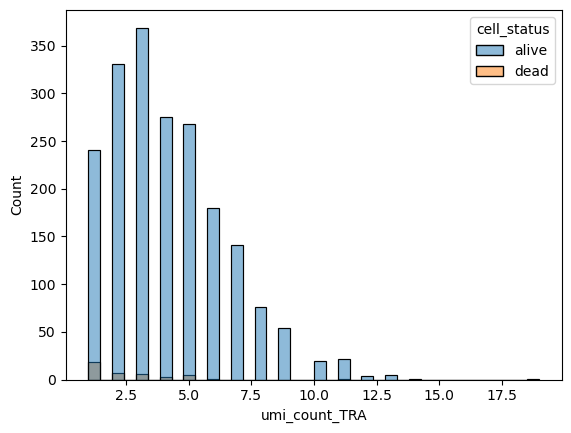

1.0     18
2.0      7
3.0      6
5.0      5
4.0      3
11.0     1
6.0      1
19.0     1
Name: umi_count_TRA, dtype: int64

In [34]:
sns.histplot(data=b, x="umi_count_TRA", hue="cell_status")
plt.show()
c.umi_count_TRA.value_counts()

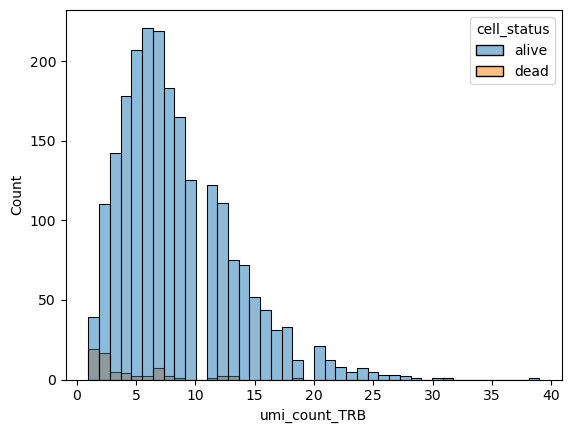

1.0     19
2.0     17
7.0      7
3.0      5
4.0      4
13.0     2
8.0      2
12.0     2
5.0      2
6.0      2
31.0     1
9.0      1
11.0     1
19.0     1
Name: umi_count_TRB, dtype: int64

In [35]:
sns.histplot(data=b, x="umi_count_TRB", hue="cell_status")
plt.show()
c.umi_count_TRB.value_counts()

In [39]:
b[b.cell_status == 'dead'].peptide_HLA_lst

20                                     ['RAKFKQLL B0801']
23                   ['VIRHKRQSW B0801' 'RAKFKQLL B0801']
41                                  ['ATTADVDAGSL A0101']
151     ['AMLIRDRL B0801' 'VIRHKRQSW B0801' 'LLFERPHTM...
195                                  ['TADVDAGSLS A0101']
                              ...                        
2057    ['RAKFKQLL B0801' 'EERQAYLTNQY A0101' 'FSAGAFI...
2088                ['RAKFKQLL B0801' 'TPRVTGGGAM B0702']
2133                                ['EERQAYLTNQY A0101']
2300                                  ['VTEHDTLLY A0101']
2336                  ['AMLIRDRL B0801' 'RAKFKQLL B0801']
Name: peptide_HLA_lst, Length: 76, dtype: object

In [44]:
b['n_peptides'] = b.umi_count_lst_mhc.apply(len)

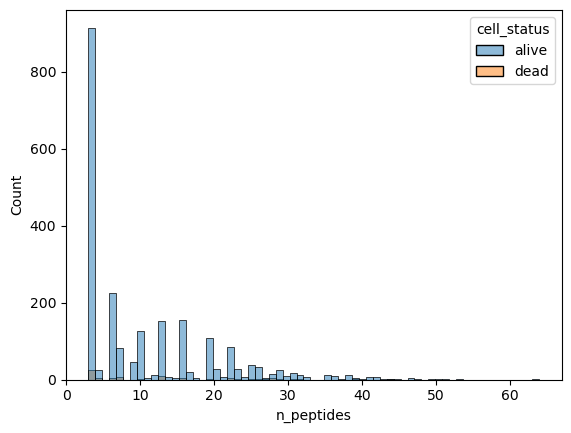

In [49]:
sns.histplot(data=b, x="n_peptides", hue="cell_status", bins=b.n_peptides.max()+1)
plt.show()